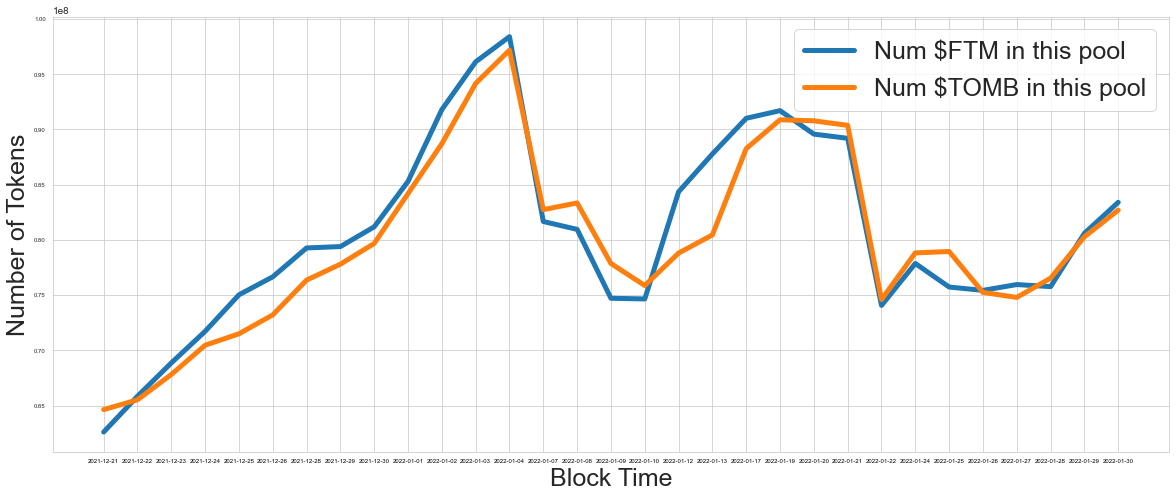

In [31]:
import web3
import json
from web3 import Web3, HTTPProvider
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

FTM_TOMB_LP_ADDRESS = '0x2A651563C9d3Af67aE0388a5c8F89b867038089e'
ABI = '[{"inputs":[],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"spender","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"Burn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1","type":"uint256"}],"name":"Mint","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"sender","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount0In","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1In","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount0Out","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"amount1Out","type":"uint256"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"Swap","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint112","name":"reserve0","type":"uint112"},{"indexed":false,"internalType":"uint112","name":"reserve1","type":"uint112"}],"name":"Sync","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"value","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[],"name":"DOMAIN_SEPARATOR","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MINIMUM_LIQUIDITY","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"PERMIT_TYPEHASH","outputs":[{"internalType":"bytes32","name":"","type":"bytes32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"allowance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"approve","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"burn","outputs":[{"internalType":"uint256","name":"amount0","type":"uint256"},{"internalType":"uint256","name":"amount1","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"factory","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getReserves","outputs":[{"internalType":"uint112","name":"_reserve0","type":"uint112"},{"internalType":"uint112","name":"_reserve1","type":"uint112"},{"internalType":"uint32","name":"_blockTimestampLast","type":"uint32"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_token0","type":"address"},{"internalType":"address","name":"_token1","type":"address"}],"name":"initialize","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"kLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"mint","outputs":[{"internalType":"uint256","name":"liquidity","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"nonces","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"spender","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"},{"internalType":"uint256","name":"deadline","type":"uint256"},{"internalType":"uint8","name":"v","type":"uint8"},{"internalType":"bytes32","name":"r","type":"bytes32"},{"internalType":"bytes32","name":"s","type":"bytes32"}],"name":"permit","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"price0CumulativeLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"price1CumulativeLast","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"}],"name":"skim","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"amount0Out","type":"uint256"},{"internalType":"uint256","name":"amount1Out","type":"uint256"},{"internalType":"address","name":"to","type":"address"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"swap","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"sync","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"token0","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"token1","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transfer","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"value","type":"uint256"}],"name":"transferFrom","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"nonpayable","type":"function"}]'

NUM_BLOCKS = 4000000
# Fantom network
rpc = 'https://rpcapi.fantom.network'

w3 = Web3(HTTPProvider(rpc))
# get current block numer
current_block = w3.eth.get_block('latest')
block_number = current_block.number

lp_contract_instance = w3.eth.contract(address=FTM_TOMB_LP_ADDRESS, abi=json.loads(ABI))

num_ftms = []
num_tombs = []
block_ids = []
block_tmstmps = []
for i in range(NUM_BLOCKS, 0, -100000):
    try:
        block_id = block_number-i
        reserves = lp_contract_instance.functions.getReserves().call(block_identifier=block_id)
        c_block = w3.eth.get_block(block_id)
        num_ftm = w3.fromWei(reserves[0], "ether")
        num_tomb = w3.fromWei(reserves[1], "ether")
        num_ftms.append(num_ftm)
        num_tombs.append(num_tomb)
        block_tmstmps.append(str(datetime.fromtimestamp(c_block.timestamp).date()))
        #block_tmstmps.append(block_id)
        block_ids.append(block_number-i)
    except:
        i += 200000
        pass

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,1, figsize=(20, 8))
ax.plot(block_tmstmps, num_ftms, lw=5, label='Num $FTM in this pool')
ax.plot(block_tmstmps, num_tombs, lw=5, label='Num $TOMB in this pool')

ax.set_xlabel("Block Time", fontsize=25)
ax.set_ylabel("Number of Tokens", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=25)

## 如何监听新的代币池子？
